In [1]:
import xarray as xr
import regionmask
import geopandas as gpd
import matplotlib.pyplot as plt
import os
import cartopy.crs as ccrs
import netCDF4
from netCDF4 import Dataset
import os, sys
import pandas as pd
import datetime
from datetime import datetime,timedelta
import numpy as np
import warnings

from mpl_toolkits.basemap import Basemap


Entradas

<GeoAxes: >

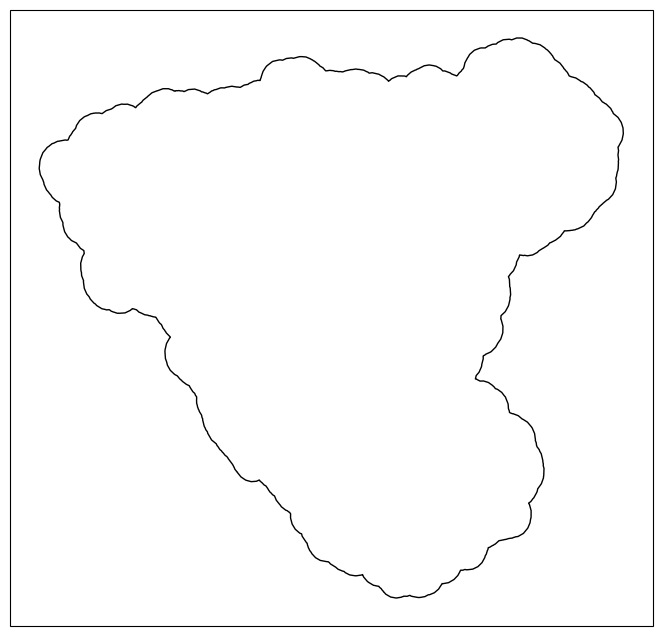

In [52]:
# Caminho de entrada do shapefile
shapefile_path = "C:\\SWAT\\CLIP_CMIP6_ibicui\\buffer_ibicui_v2.shp"

# Ler e plotar o shapefile
basins = gpd.read_file(shapefile_path)
basins = basins.to_crs("EPSG:4326")
fig, ax = plt.subplots(figsize=(12, 8), subplot_kw={'projection': ccrs.PlateCarree()})
basins.plot(ax=ax, edgecolor='black', facecolor='none')



In [53]:
#Ler arquivo NC
data = Dataset("D:\\CLIMBra\\Prec\\hist\\ACCESS-CM2-pr-hist.nc", 'r')

print("Aqui estao todas as variaveis do data")
print(data.variables.keys())
print()
print(data)

Aqui estao todas as variaveis do data
dict_keys(['lon', 'lat', 'time', 'pr'])

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    creation_date: 2022-04-10
    frequency: day
    mip_era: CMIP6
    parent_variant_label: r1i1p1f1
    source_id: ACCESS-CM2-
    table_id: day
    scenario: historical
    variable_id: pr
    variant_label: r1i1p1f1
    method_regrid: Bilinear
    method_biasCorrection: qdm-quantileDeltaMapping
    R_package_URL: https://github.com/SantanderMetGroup/climate4R
    dimensions(sizes): lon(168), lat(162), time(12419)
    variables(dimensions): float64 lon(lon), float64 lat(lat), float64 time(time), float32 pr(time, lat, lon)
    groups: 


In [54]:
tp = data.variables['pr'][:]
unitp = data.variables['pr'].units
unitt = data.variables['time'].units
times = data.variables['time'][:]
lat = data.variables['lat'][:]
lon = data.variables['lon'][:]

In [55]:
fig = plt.figure(figsize=(12,9))

map = Basemap(projection='mill',
            llcrnrlat= -34.125,
            urcrnrlat= 6.125,
            llcrnrlon= -74.125,
            urcrnrlon= -32.375,
            resolution= 'c')

<Figure size 1200x900 with 0 Axes>

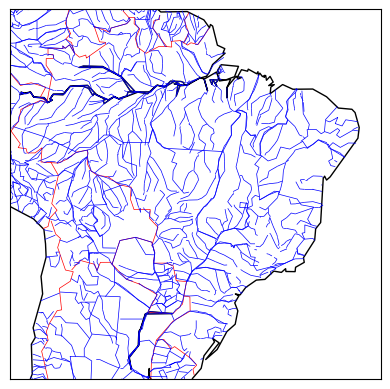

In [56]:
map.drawcoastlines()
map.drawcountries(color='red')
map.drawstates(color='blue')
map.drawrivers(color='blue')
plt.show()

In [57]:
lons,lats = np.meshgrid(lon,lat)
# isso cria uma malha de grids usando lon e lat definidos acima no script
x,y = map(lons,lats)

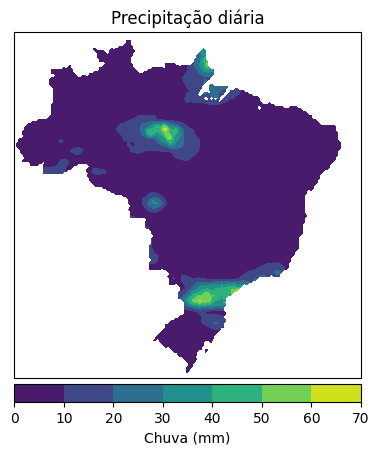

In [62]:
pr = map.contourf(x,y,tp[1,:,:])
cb = map.colorbar(pr,'bottom', size="5%", pad="2%")
plt.title('Precipitação diária')
cb.set_label('Chuva ({})'.format(unitp))

Recortar pelo Shapefile

In [61]:
# Criar um objeto Regionmask
basins_mask_poly = regionmask.from_geopandas(basins, names="gid")
# Obter  nomes do polígono
names = basins_mask_poly.names
print(f"Basin names: {names}")

Basin names: [0]


In [60]:
# Abrir el archivo NetCDF
ds = xr.open_dataset("D:\\CLIMBra\\Prec\\hist\\ACCESS-CM2-pr-hist.nc")
ds

<xarray.Dataset> Size: 1GB
Dimensions:  (lon: 168, lat: 162, time: 12419)
Coordinates:
  * lon      (lon) float64 1kB -74.12 -73.88 -73.62 ... -32.88 -32.62 -32.38
  * lat      (lat) float64 1kB -34.12 -33.88 -33.62 -33.38 ... 5.625 5.875 6.125
  * time     (time) datetime64[ns] 99kB 1980-01-01T12:00:00 ... 2013-12-31T12...
Data variables:
    pr       (time, lat, lon) float32 1GB ...
Attributes:
    creation_date:          2022-04-10
    frequency:              day
    mip_era:                CMIP6
    parent_variant_label:   r1i1p1f1
    source_id:              ACCESS-CM2-
    table_id:               day
    scenario:               historical
    variable_id:            pr
    variant_label:          r1i1p1f1
    method_regrid:          Bilinear
    method_biasCorrection:  qdm-quantileDeltaMapping
    R_package_URL:          https://github.com/SantanderMetGroup/climate4R

In [63]:
mask = basins_mask_poly.mask(ds.isel(time=0),lat_name='lat', lon_name='lon')
mask

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\regionmask\core\mask.py:179: FutureWarning: Passing 'lon_name' and 'lat_name' was deprecated in v0.10.0. Please pass the coordinates directly, e.g., `mask*(ds[lon_name], ds[lat_name])`.
  warnings.warn(


<xarray.DataArray 'mask' (lat: 162, lon: 168)> Size: 218kB
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]])
Coordinates:
  * lat      (lat) float64 1kB -34.12 -33.88 -33.62 -33.38 ... 5.625 5.875 6.125
    time     datetime64[ns] 8B 1980-01-01T12:00:00
  * lon      (lon) float64 1kB -74.12 -73.88 -73.62 ... -32.88 -32.62 -32.38
Attributes:
    standard_name:  region
    flag_values:    [0]
    flag_meanings:  r0

In [64]:
mask.to_netcdf('C:\SWAT\CLIP_CMIP6_ibicui\mask_ibicui_com_buffer.nc')

<>:1: SyntaxWarning: invalid escape sequence '\S'
<>:1: SyntaxWarning: invalid escape sequence '\S'
C:\Users\User\AppData\Local\Temp\ipykernel_11504\2287198848.py:1: SyntaxWarning: invalid escape sequence '\S'
  mask.to_netcdf('C:\SWAT\CLIP_CMIP6_ibicui\mask_ibicui_com_buffer.nc')


In [65]:
masked_shape = ds.where(mask==0)
varpr = masked_shape['pr']

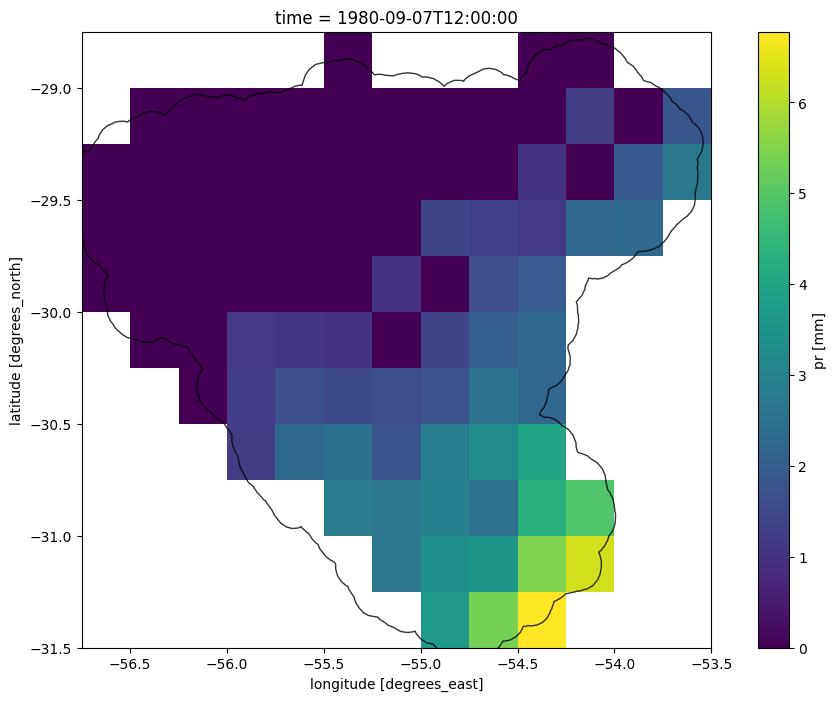

In [66]:


lat_min, lat_max = -31.5, -28.75
lon_min, lon_max = -56.75, -53.5

plt.figure(figsize=(12, 8))
ax = plt.axes()

# Definindo os limites dos eixos
ax.set_xlim([lon_min, lon_max])
ax.set_ylim([lat_min, lat_max])

# Plotando apenas os dados dentro dos limites especificados
varpr_subset = varpr.where((varpr.lat >= lat_min) & (varpr.lat <= lat_max) &
                           (varpr.lon >= lon_min) & (varpr.lon <= lon_max), drop=True)
varpr_subset.isel(time=250).plot(ax=ax)

# Plotando basins
basins_subset = basins.cx[lon_min:lon_max, lat_min:lat_max]  # Filtrando basins para a área de interesse
basins_subset.plot(ax=ax, alpha=0.8, facecolor='none')

plt.show()
